<div align='center'>
<h1>TUGAS PRAKTIKUM GREEDY BFS
<h2>Gendhi Ramona Prastyo (1203230011) IF-03-02
</div>

##1. Buatlah graf berbobot (weighted graf) dari 2 gambar graf berikut ini menggunakan library NetworkX. Kemudian lakukan penelurusan Depth-First Search menggunakan library NetworkX! Kemudian periksalah hasilnya secara manual! Untuk graf Eropa, kota asal (source)-nya adalah Arad. Untuk graf Pulau Jawa, kota asal (source)-nya adalah Bandung. Periksa apakah informasi weight digunakan atau tidak pada algoritma Depth First Search ini!


A.Graf Peta peta besar di Eropa

Jalur Greedy BFS dari Arad ke Bucharest:
Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest


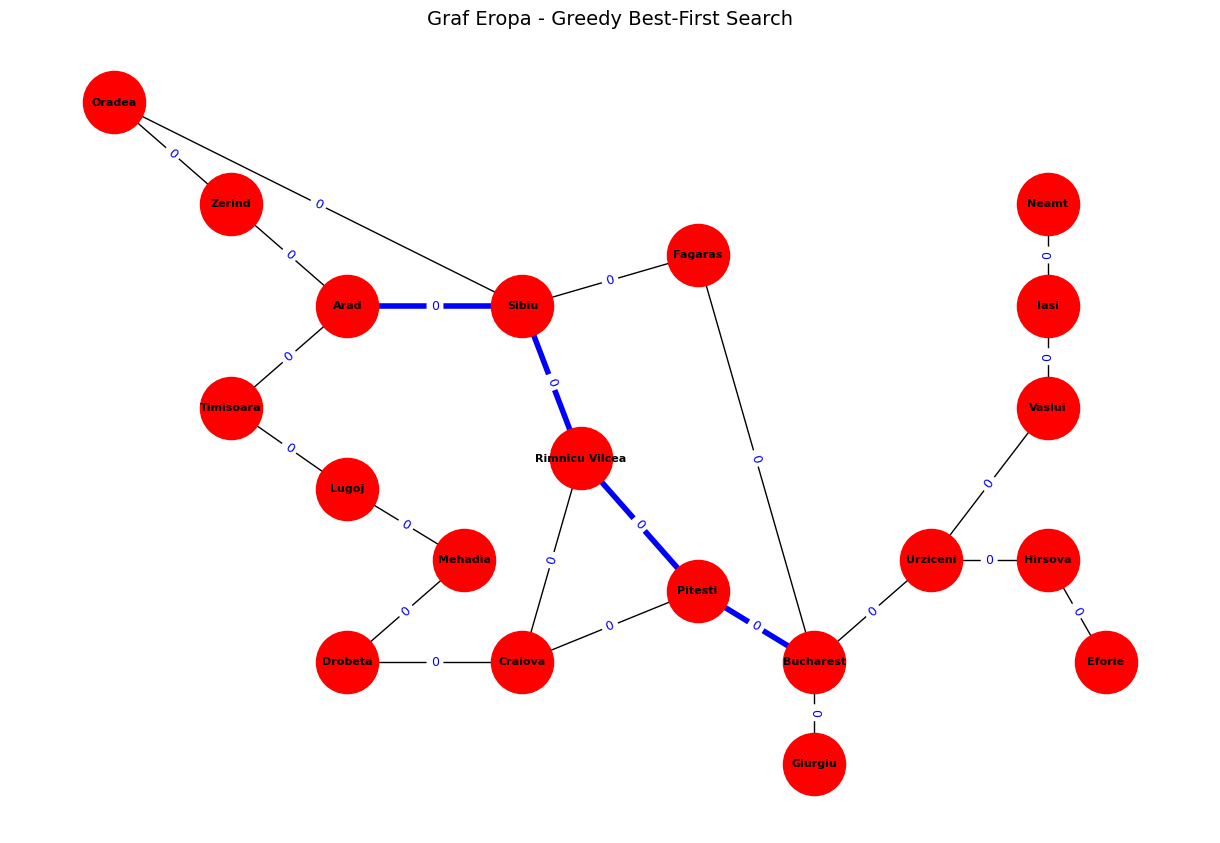

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import heapq


# Buat graph
G = nx.Graph()

# Tambahkan edges dan jaraknya (sesuai gambar)
edges = [
    ("Oradea", "Zerind", 0),
    ("Zerind", "Arad", 0),
    ("Arad", "Sibiu", 0),
    ("Arad", "Timisoara", 0),
    ("Timisoara", "Lugoj", 0),
    ("Lugoj", "Mehadia", 0),
    ("Mehadia", "Drobeta", 0),
    ("Drobeta", "Craiova", 0),
    ("Craiova", "Rimnicu Vilcea", 0),
    ("Craiova", "Pitesti", 0),
    ("Rimnicu Vilcea", "Sibiu", 0),
    ("Rimnicu Vilcea", "Pitesti", 0),
    ("Sibiu", "Fagaras", 0),
    ("Fagaras", "Bucharest", 0),
    ("Pitesti", "Bucharest", 0),
    ("Bucharest", "Giurgiu", 0),
    ("Bucharest", "Urziceni", 0),
    ("Urziceni", "Hirsova", 0),
    ("Hirsova", "Eforie", 0),
    ("Urziceni", "Vaslui", 0),
    ("Vaslui", "Iasi", 0),
    ("Iasi", "Neamt", 0),
    ("Sibiu", "Oradea", 0)
]

G.add_weighted_edges_from(edges)


pos = {
    "Oradea": (1, 8),
    "Zerind": (2, 7),
    "Arad": (3, 6),
    "Timisoara": (2, 5),
    "Lugoj": (3, 4.2),
    "Mehadia": (4, 3.5),
    "Drobeta": (3, 2.5),
    "Craiova": (4.5, 2.5),
    "Rimnicu Vilcea": (5, 4.5),
    "Pitesti": (6, 3.2),
    "Sibiu": (4.5, 6),
    "Fagaras": (6, 6.5),
    "Bucharest": (7, 2.5),
    "Giurgiu": (7, 1.5),
    "Urziceni": (8, 3.5),
    "Hirsova": (9, 3.5),
    "Eforie": (9.5, 2.5),
    "Vaslui": (9, 5),
    "Iasi": (9, 6),
    "Neamt": (9, 7),
}

def euclidean_heuristic(a, b):
    x1, y1 = pos[a]
    x2, y2 = pos[b]
    return math.hypot(x2 - x1, y2 - y1)

def greedy_bfs(graph, start, goal):
    visited = set()
    queue = [(euclidean_heuristic(start, goal), start, [start])]

    while queue:
        _, current, path = heapq.heappop(queue)
        if current in visited:
            continue
        visited.add(current)
        if current == goal:
            return path
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                heapq.heappush(queue, (euclidean_heuristic(neighbor, goal), neighbor, path + [neighbor]))
    return None

# Jalankan Greedy BFS
start_city = "Arad"
goal_city = "Bucharest"
path_result = greedy_bfs(G, start_city, goal_city)

# Gambar graf
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='red', node_size=2000, font_size=8, font_weight='bold')
if path_result:
    edge_path = list(zip(path_result, path_result[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=edge_path, edge_color='blue', width=4)
    print(f"Jalur Greedy BFS dari {start_city} ke {goal_city}:\n{' -> '.join(path_result)}")
else:
    print("Jalur tidak ditemukan.")


edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='Blue',
    font_size=9
)
plt.title("Graf Eropa - Greedy Best-First Search", fontsize=14)
plt.axis('off')
plt.show()


B. Graf Peta peta besar di Indonesia (Pulau Jawa)

Jalur Greedy BFS dari Bandung ke Malang:
Bandung -> Yogyakarta -> Surakarta -> Malang


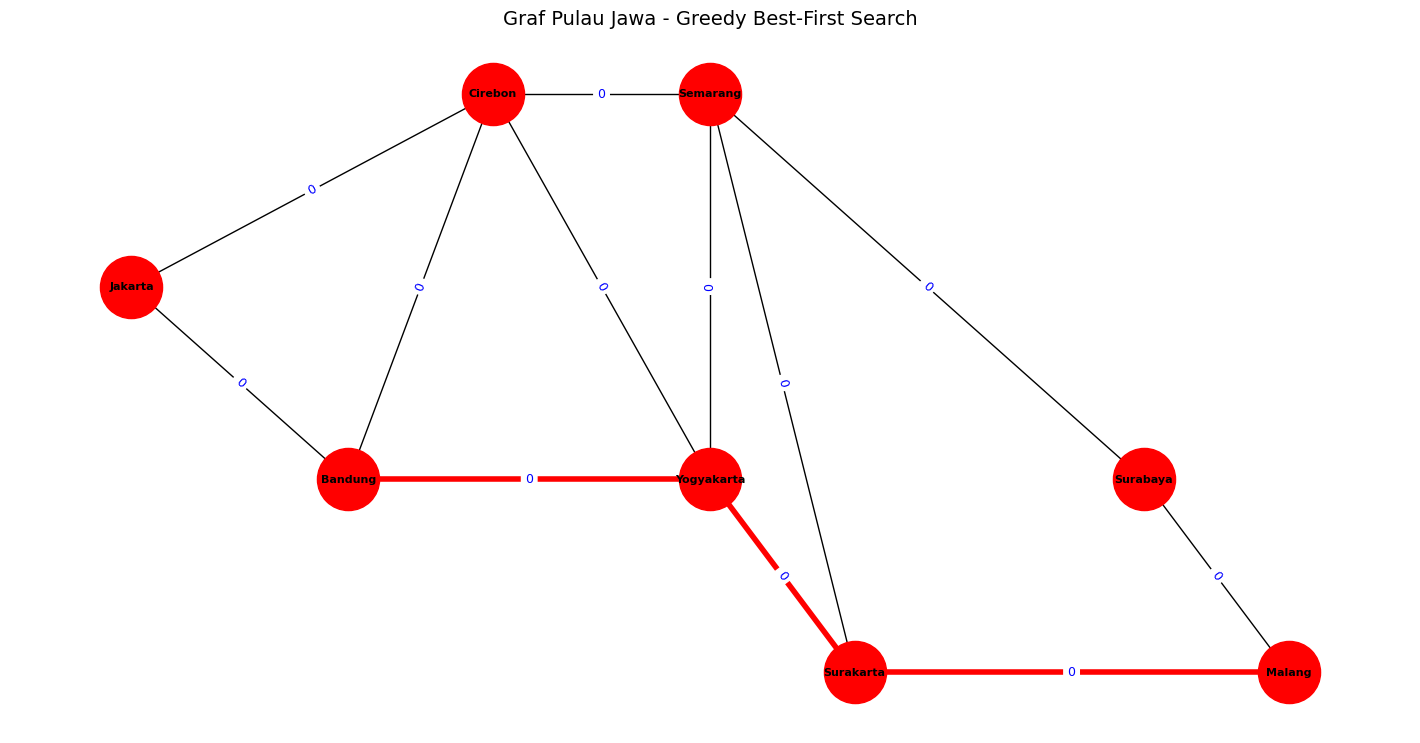

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import heapq

# Inisialisasi graf
G = nx.Graph()

# Menambahkan edge dan bobot jarak antar kota
edges = [
    ('Jakarta', 'Cirebon', 0),
    ('Jakarta', 'Bandung', 0),
    ('Cirebon', 'Bandung', 0),
    ('Cirebon', 'Yogyakarta', 0),
    ('Cirebon', 'Semarang', 0),
    ('Bandung', 'Yogyakarta', 0),
    ('Semarang', 'Yogyakarta', 0),
    ('Semarang', 'Surakarta', 0),
    ('Semarang', 'Surabaya', 0),
    ('Surabaya', 'Malang', 0),
    ('Surakarta', 'Malang', 0),
    ('Surakarta', 'Yogyakarta', 0)
]
G.add_weighted_edges_from(edges)

# Posisi manual sesuai layout dari peta
pos = {
    'Jakarta': (0, 0),
    'Bandung': (1.5, -1),
    'Cirebon': (2.5, 1),
    'Semarang': (4, 1),
    'Yogyakarta': (4, -1),
    'Surakarta': (5, -2),
    'Surabaya': (7, -1),
    'Malang': (8, -2),
}

def euclidean_heuristic(a, b):
    x1, y1 = pos[a]
    x2, y2 = pos[b]
    return math.hypot(x2 - x1, y2 - y1)

def greedy_bfs(graph, start, goal):
    visited = set()
    queue = [(euclidean_heuristic(start, goal), start, [start])]

    while queue:
        _, current, path = heapq.heappop(queue)
        if current in visited:
            continue
        visited.add(current)
        if current == goal:
            return path
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                heapq.heappush(queue, (euclidean_heuristic(neighbor, goal), neighbor, path + [neighbor]))
    return None

# Jalankan Greedy BFS
start_city = "Bandung"
goal_city = "Malang"
path_result = greedy_bfs(G, start_city, goal_city)

# Visualisasi hasil
plt.figure(figsize=(14, 7))
nx.draw(G, pos, with_labels=True, node_color='red', node_size=2000, font_size=8, font_weight='bold')
if path_result:
    edge_path = list(zip(path_result, path_result[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=edge_path, edge_color='red', width=4)
    print(f"Jalur Greedy BFS dari {start_city} ke {goal_city}:\n{' -> '.join(path_result)}")
else:
    print("Jalur tidak ditemukan.")

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='Blue',
    font_size=9

)
plt.title("Graf Pulau Jawa - Greedy Best-First Search", fontsize=14)
plt.axis('off')
plt.show()